In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import numpy as np
from   sklearn.preprocessing import PolynomialFeatures
from matplotlib.colors import ListedColormap
%matplotlib inline

In [4]:
df = pd.read_csv('glass.csv');
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
features = df.drop('Type', axis = 1);
y = df.Type;

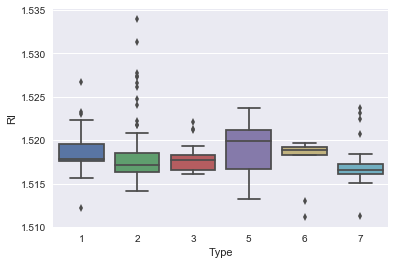

In [6]:
sns.boxplot(y = features.RI,x = y);

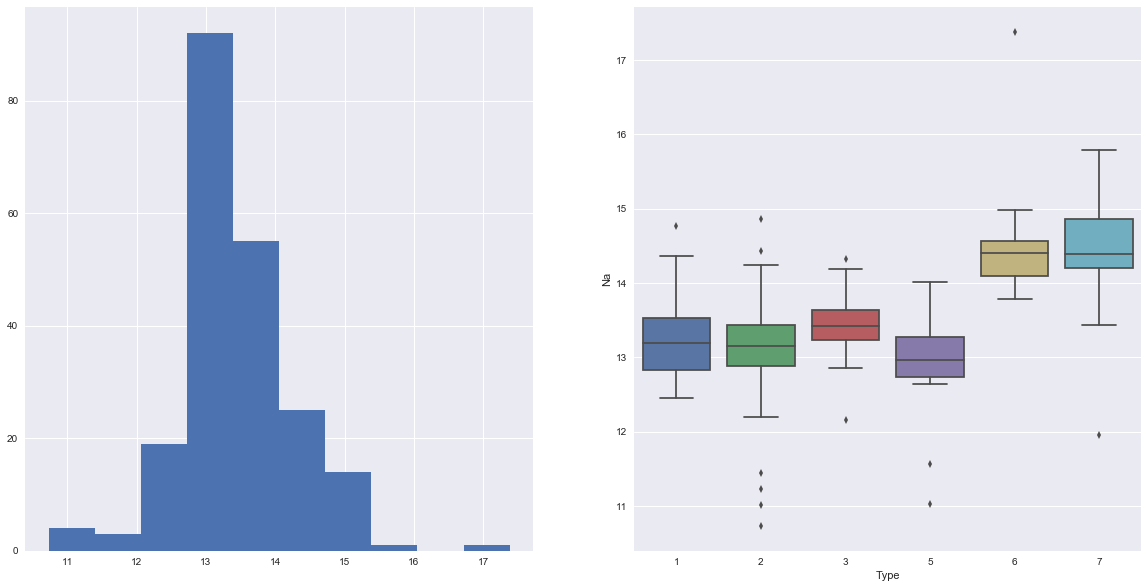

In [7]:
fName = 'Na'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);

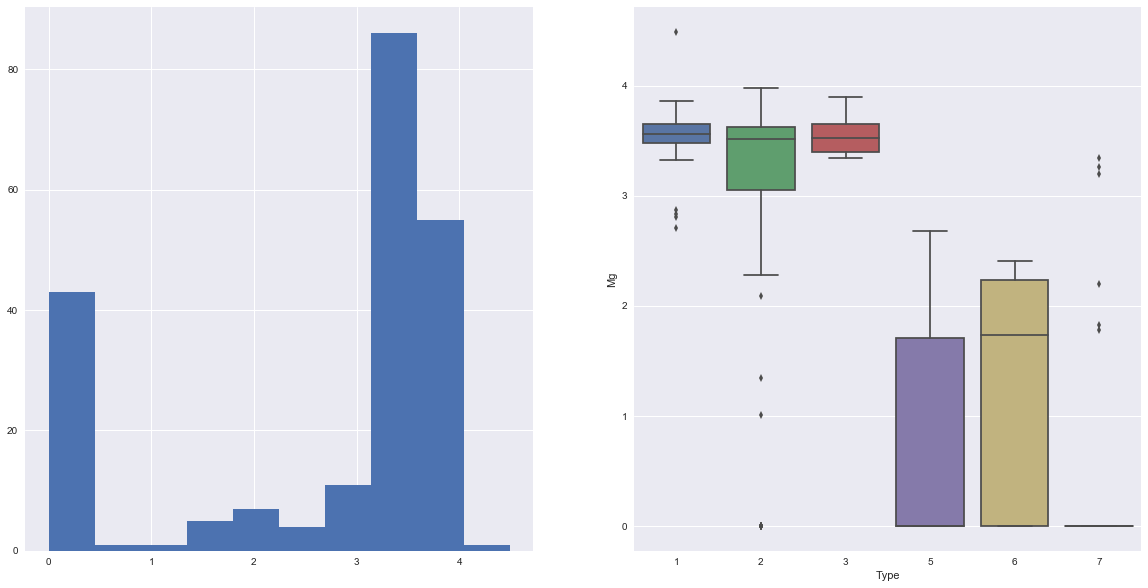

In [8]:
fName = 'Mg'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);

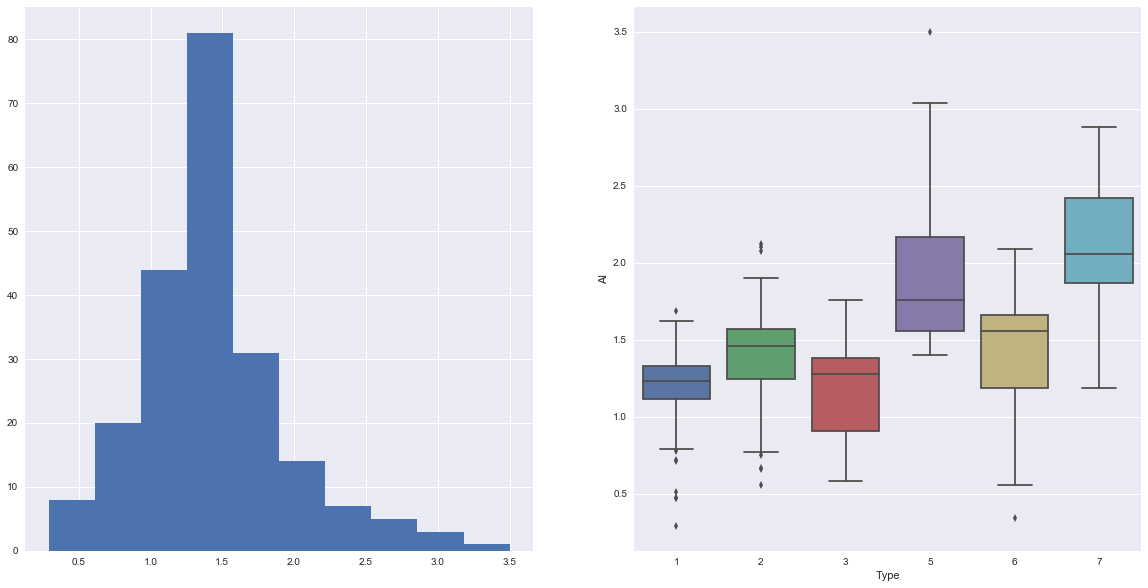

In [9]:
fName = 'Al'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);

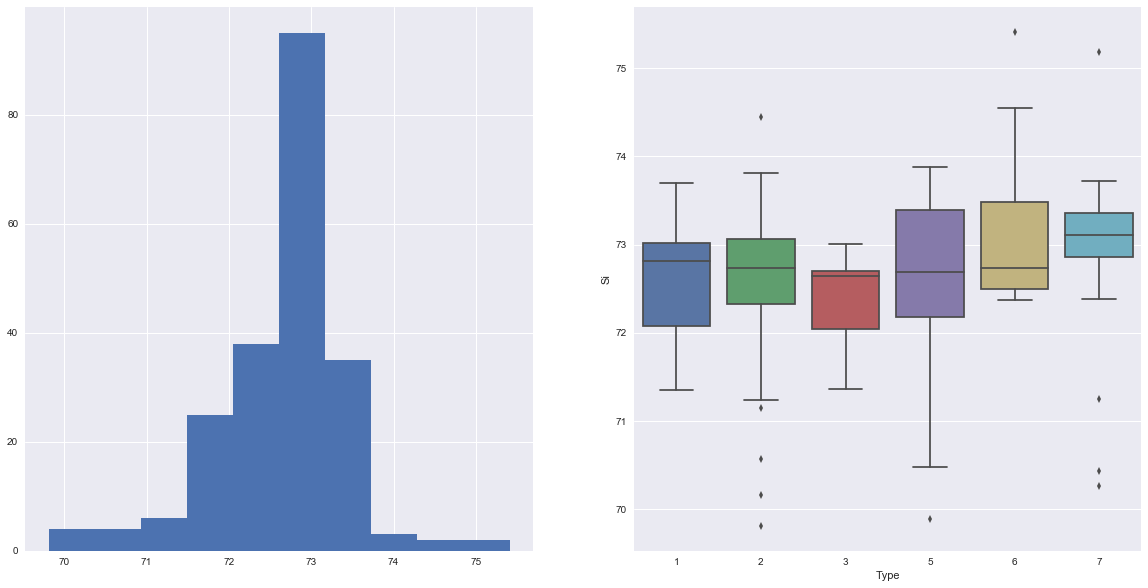

In [10]:
fName = 'Si'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);

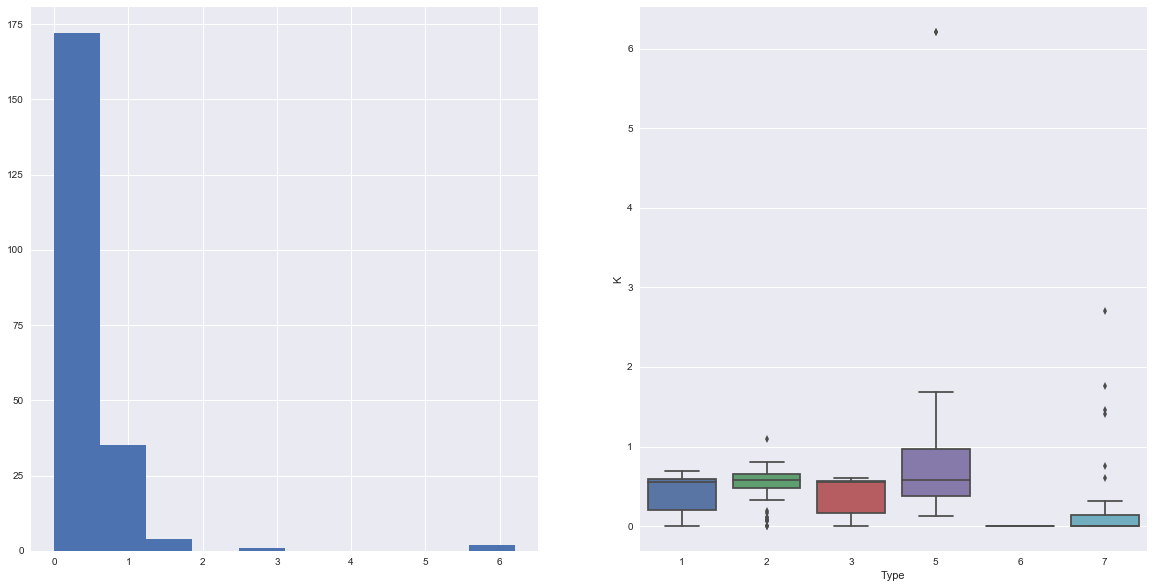

In [11]:
fName = 'K'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);

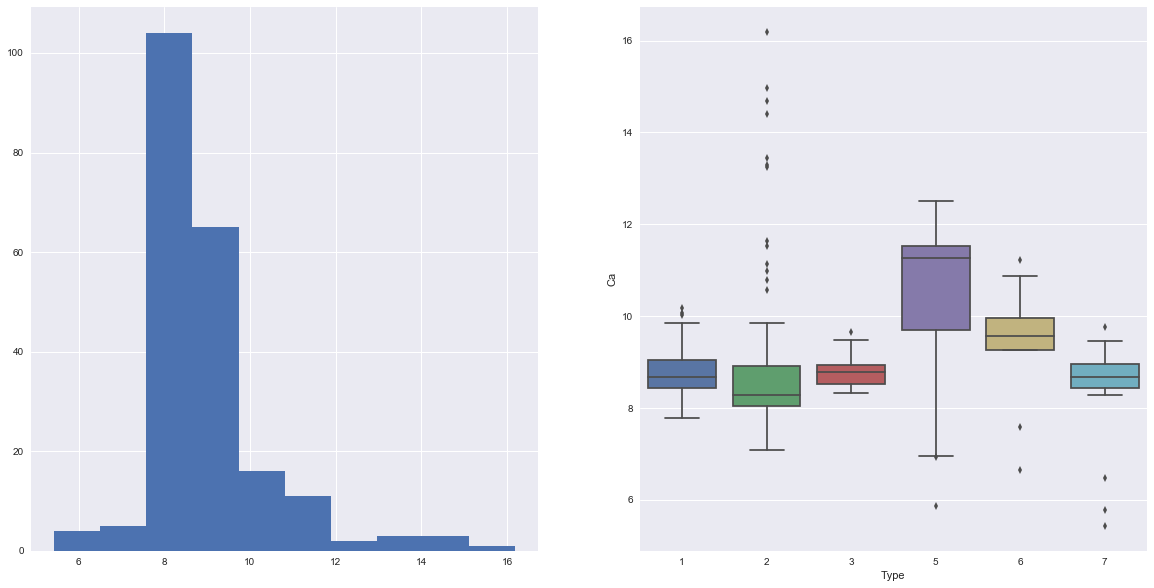

In [12]:
fName = 'Ca'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);

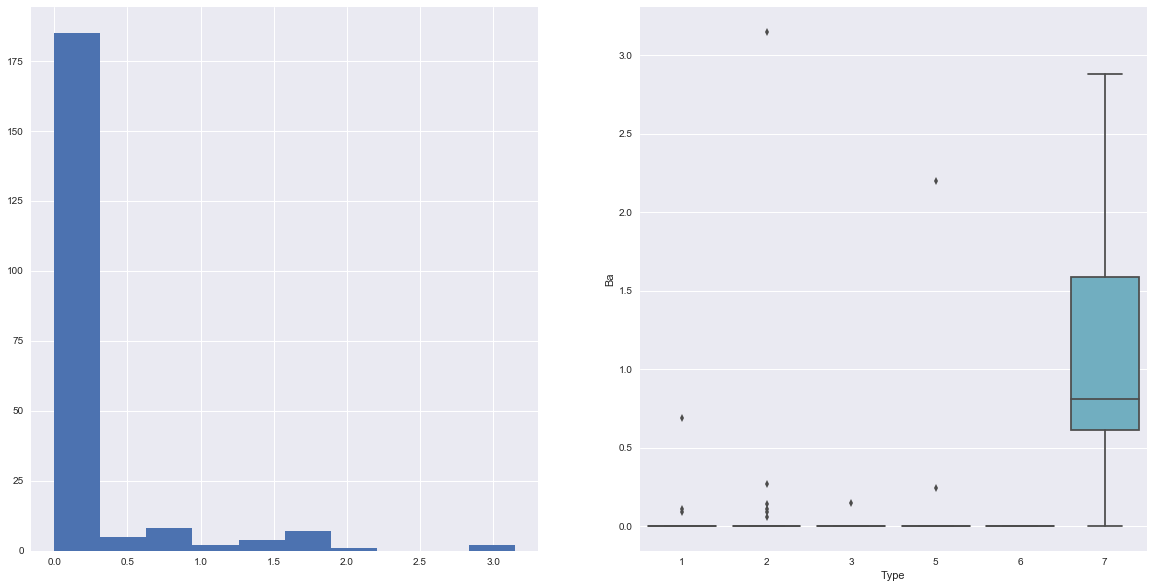

In [13]:
fName = 'Ba'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);

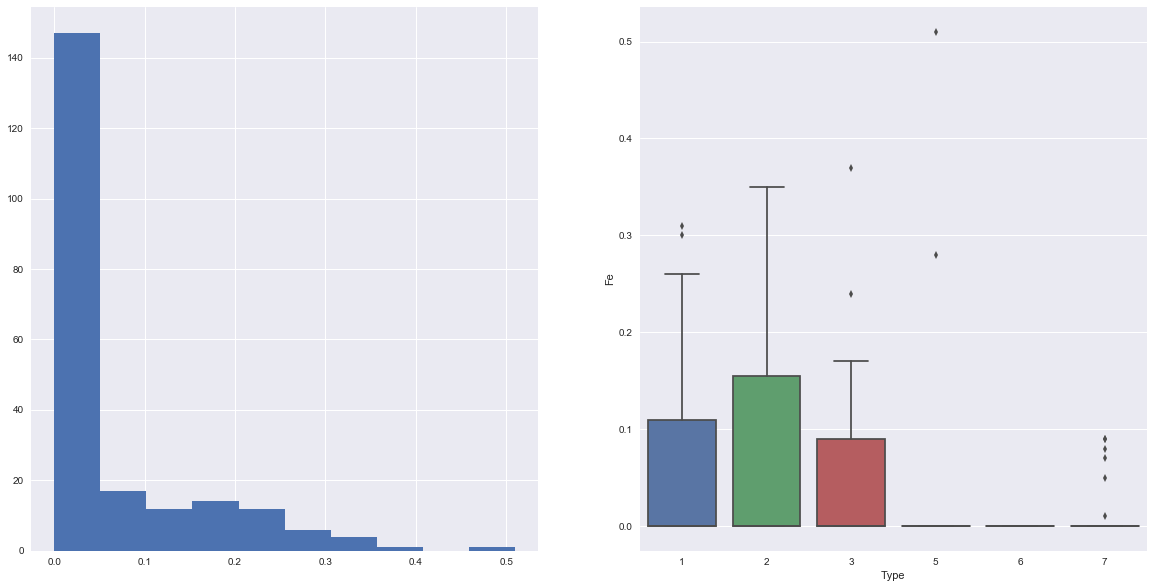

In [14]:
fName = 'Fe'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);

Железо - только 1,2 и 3

Барий - только в 7

Кальций - повышенная концентрация в 5 типе.

Калий практически отсутствует в 6 типе.

Концентрация натрия повышена в образцах 6 и 7 

Магний отсутствует в 7 типе. Много в 1,2,3

Кремний - основной компонент стекла. Вряд ли по нему можно будет что-то выяснить.

Таким образом, виды 5, 6 и 7 легко выделяются. Проверим это.

In [15]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [17]:
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11


In [18]:
def fit(dataset):
    X = dataset.drop('Type', axis = 1);
    y = dataset.Type;
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=0);
    clf.fit(X_train,y_train);
    #print clf.predict(X_test)
    print 'Accuracy is',clf.score(X_test,y_test)
    print 'Feature importance';
    for key, val in zip (features.columns,clf.feature_importances_):
        print key, val

In [19]:
fit(df)

NameError: global name 'clf' is not defined

In [55]:
features['total'] = features.Na+features.Mg+features.Al+features.Si+features.K+features.Ca+features.Ba+features.Fe;

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,total
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,99.82
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,99.89
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,99.78
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,99.59
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,99.83


In [65]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=0);
clf.fit(X_train,y_train);
print clf.predict(X_test)
print clf.score(X_test,y_test)
for key, val in zip (features.columns,clf.feature_importances_):
    print key, val

[7 1 1 6 2 2 1 2 1 2 2 2 2 2 2 7 2 2 1 2 5 3 7 5 1 1 7 1 2 2 1 1 2 1 3 1 1
 3 1 7 5 6 2 2 2 2 1 2 1 2 1 6 7 1 2 1 1 2 7 1 1 1 1 5 1 2 2 1 1 1 1]
0.661971830986
RI 0.15111008578
Na 0.0262567282272
Mg 0.202186899899
Al 0.174226486532
Si 0.0568302996874
K 0.0739403453689
Ca 0.113722549228
Ba 0.201726605276
Fe 0.0


In [107]:
df2 = df.copy();
df2['total'] = df2.Na+df2.Mg+df2.Al+df2.Si+df2.K+df2.Ca+df2.Ba+df2.Fe;
for feature in df2.columns.drop(['RI','Type','Si','total']):
    # print feature
    df2[feature] = df2[feature]/(df2.total - df2.Si)

df2.head()    

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,total
0,1.52101,0.486448,0.160128,0.039230,71.78,0.002140,0.312054,0.0,0.0,1,99.82
1,1.51761,0.511414,0.132548,0.050074,72.73,0.017673,0.288292,0.0,0.0,1,99.89
2,1.51618,0.505039,0.132512,0.057484,72.99,0.014558,0.290407,0.0,0.0,1,99.78
3,1.51766,0.489622,0.136768,0.047813,72.61,0.021127,0.304670,0.0,0.0,1,99.59
4,1.51742,0.496075,0.135327,0.046355,73.08,0.020561,0.301682,0.0,0.0,1,99.83


In [109]:
fit(df2)

Accuracy is 0.647887323944
Feature importance
RI 0.085463827277
Na 0.0927140803988
Mg 0.202186899899
Al 0.204158459321
Si 0.0474765581908
K 0.0589285714286
Ca 0.107344998208
Ba 0.186475443836
Fe 0.0152511614402


In [174]:
def fit2(dataset):
    X = dataset.drop('Type', axis = 1);
    y = dataset.Type;
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=0);
    plf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False);
    X_train2 = plf.fit_transform(X_train);
    X_test2 = plf.transform(X_test)
    
    clf = tree.DecisionTreeClassifier(random_state = 42)
    clf.fit(X_train2,y_train);
    #print clf.predict(X_test)
    print 'Accuracy is',clf.score(X_test2,y_test)
    print 'Feature importance';
    for key, val in zip (plf.get_feature_names(),clf.feature_importances_):
        print key, val

In [175]:
fit2(df2)

Accuracy is 0.676056338028
Feature importance
x0 0.0170068027211
x1 0.0663224813735
x2 0.0
x3 0.0274376417234
x4 0.0266599909612
x5 0.0160349854227
x6 0.0
x7 0.0
x8 0.0
x0^2 0.0289199676478
x0 x1 0.0
x0 x2 0.0
x0 x3 0.0233843537415
x0 x4 0.0
x0 x5 0.0
x0 x6 0.0093537414966
x0 x7 0.0
x0 x8 0.0
x1^2 0.0
x1 x2 0.0
x1 x3 0.0179932631968
x1 x4 0.0698635406544
x1 x5 0.0
x1 x6 0.0
x1 x7 0.0
x1 x8 0.0
x2^2 0.00815111758989
x2 x3 0.0
x2 x4 0.015731292517
x2 x5 0.0483276643991
x2 x6 0.141692403458
x2 x7 0.0
x2 x8 0.0
x3^2 0.0093537414966
x3 x4 0.0
x3 x5 0.0318027210884
x3 x6 0.100833702087
x3 x7 0.0
x3 x8 0.0172420634921
x4^2 0.0346088435374
x4 x5 0.0
x4 x6 0.0584453743232
x4 x7 0.0
x4 x8 0.0
x5^2 0.0
x5 x6 0.0443588632364
x5 x7 0.0
x5 x8 0.0
x6^2 0.0
x6 x7 0.186475443836
x6 x8 0.0
x7^2 0.0
x7 x8 0.0
x8^2 0.0


In [178]:
def fit3(dataset):
    from sklearn.neighbors import KNeighborsClassifier
    X = dataset.drop('Type', axis = 1);
    y = dataset.Type;
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=0);
    plf = PolynomialFeatures(degree=1, interaction_only=False, include_bias=False);
    X_train2 = plf.fit_transform(X_train);
    X_test2 = plf.transform(X_test)
    
    clf = KNeighborsClassifier();
    clf.fit(X_train2,y_train);
    #print clf.predict(X_test)
    print 'Accuracy is',clf.score(X_test2,y_test)
    print 'Feature importance';
    for key, val in zip (plf.get_feature_names(),clf.feature_importances_):
        print key, val

In [179]:
fit3(df2)

Accuracy is 0.661971830986
Feature importance


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [166]:
fit(df2)

Accuracy is 0.647887323944
Feature importance
RI 0.0948175687736
Na 0.0740065974056
Mg 0.192833158403
Al 0.160195874287
Si 0.0961160139732
K 0.0729591836735
Ca 0.107344998208
Ba 0.186475443836
Fe 0.0152511614402


In [180]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


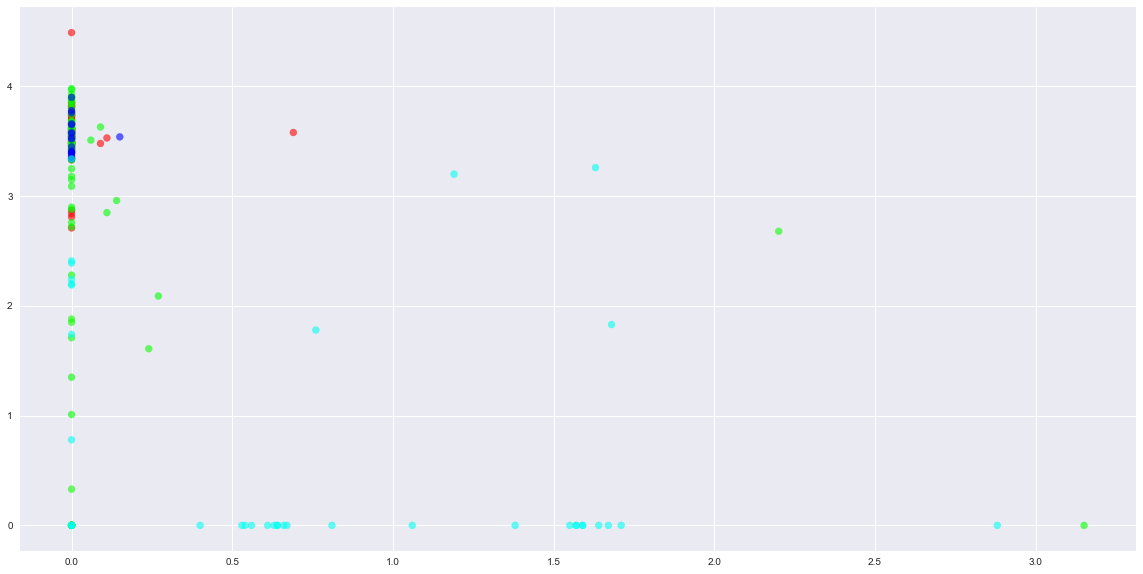

In [209]:
plt.figure(figsize=[20,10])
cm_bright = ListedColormap(['#FF0000', '#00FF00','#0000FF','#FFF000','#0FFF00','#00FFF0'])
plt.scatter(df.Ba,df.Mg,c=df.Type,cmap=cm_bright, alpha=0.6)

Железо - только 1,2 и 3

Барий - только в 7

Кальций - повышенная концентрация в 5 типе.

Калий практически отсутствует в 6 типе.

Концентрация натрия повышена в образцах 6 и 7 

Магний отсутствует в 7 типе. Много в 1,2,3

Кремний - основной компонент стекла. Вряд ли по нему можно будет что-то выяснить.

Таким образом, виды 5, 6 и 7 легко выделяются. Проверим это.